In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.rcParams['axes.unicode_minus'] = False
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

df = pd.read_excel("통합파일.xlsx")

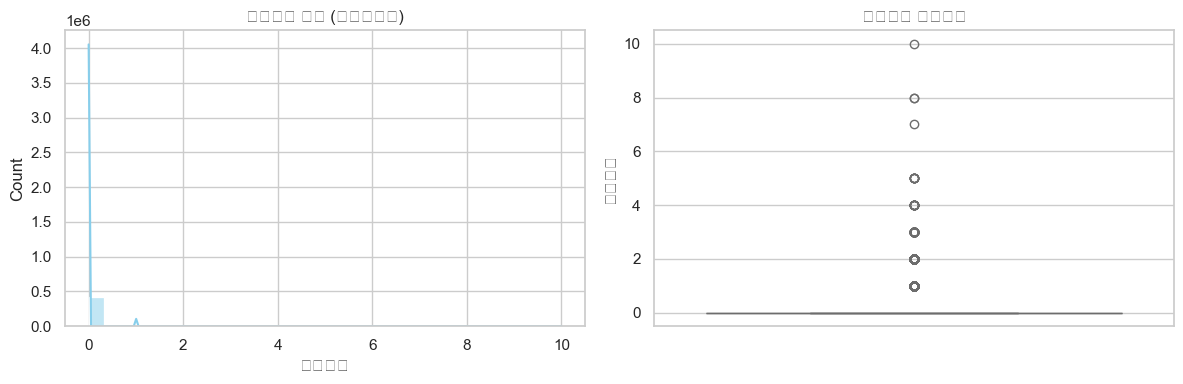

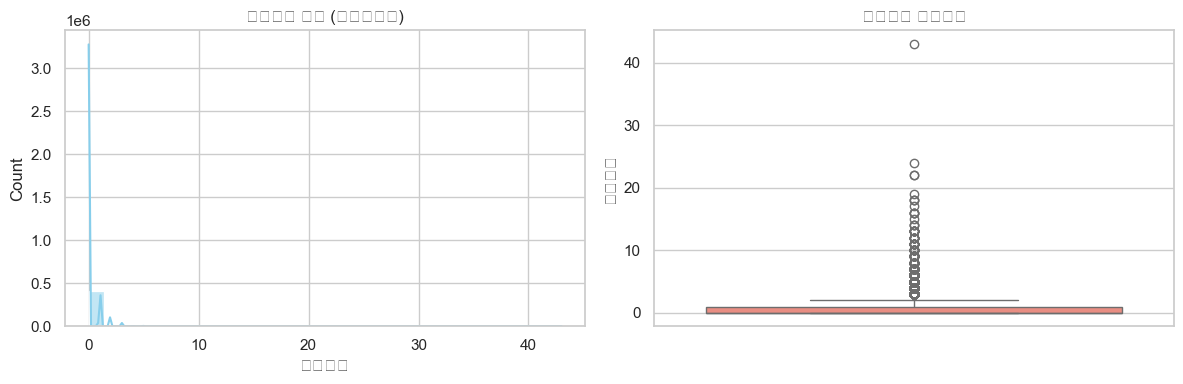

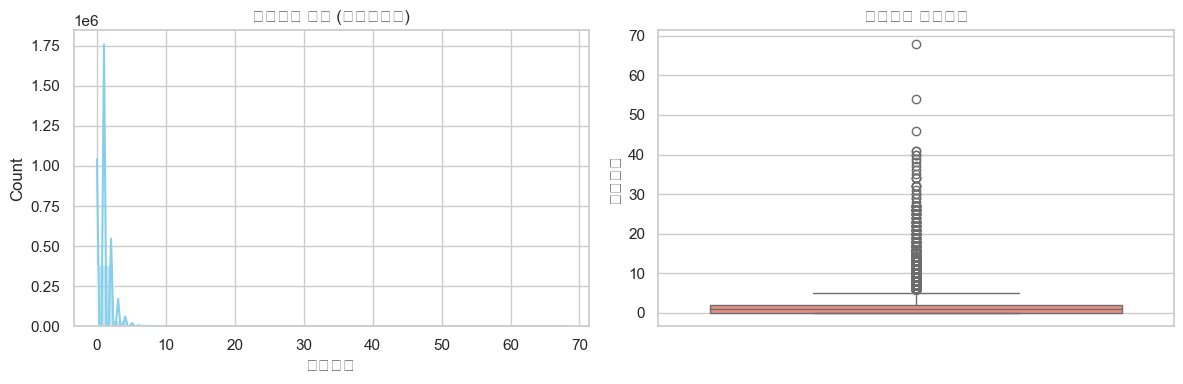

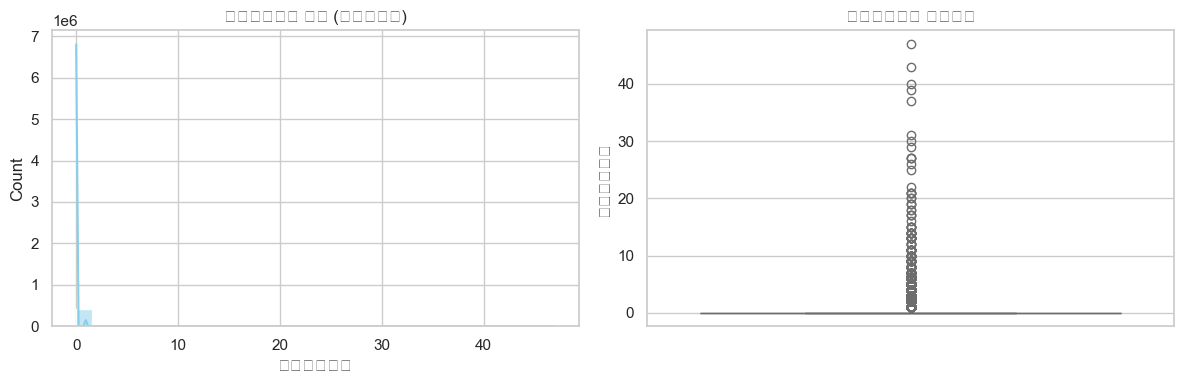

In [7]:
numeric_cols = ['사망자수', '중상자수', '경상자수', '부상신고자수']

for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col].dropna(), bins=30, ax=axes[0], color='skyblue', kde=True)
    axes[0].set_title(f"{col} 분포 (히스토그램)")
    sns.boxplot(y=df[col].dropna(), ax=axes[1], color='salmon')
    axes[1].set_title(f"{col} 박스플롯")
    plt.tight_layout()
    plt.show()


In [ ]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("사고 관련 변수 간 상관관계")
plt.tight_layout()
plt.show()


In [ ]:
for col in ['사고유형', '법규위반']:
    vc = df[col].value_counts().head(10)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=vc.values, y=vc.index, palette='viridis')
    plt.title(f"{col} (상위 10개)")
    plt.xlabel("건수")
    plt.tight_layout()
    plt.show()


In [ ]:
for col in ['노면상태', '기상상태', '도로형태']:
    vc = df[col].value_counts().head(10)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=vc.values, y=vc.index, palette='pastel')
    plt.title(f"{col} (상위 10개)")
    plt.xlabel("건수")
    plt.tight_layout()
    plt.show()


In [ ]:
region_counts = df['시군구'].value_counts().head(15)
plt.figure(figsize=(10, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='coolwarm')
plt.title("시군구별 사고건수 (Top 15)")
plt.ylabel("건수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df['발생년월'] = pd.to_datetime(df['발생년월'], errors='coerce')
df_valid_date = df[df['발생년월'].notnull()]
monthly = df_valid_date['발생년월'].dt.to_period('M').value_counts().sort_index()

if not monthly.empty:
    monthly.index = monthly.index.to_timestamp()
    plt.figure(figsize=(12, 5))
    plt.plot(monthly.index, monthly.values, marker='o')
    plt.title("월별 사고 발생 추이")
    plt.xlabel("발생 월")
    plt.ylabel("건수")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("❗ 유효한 월별 데이터가 없습니다.")


In [ ]:
cross_tab = pd.crosstab(df['법규위반'], df['사고유형'])

if not cross_tab.empty:
    plt.figure(figsize=(12, 6))
    sns.heatmap(cross_tab, cmap='YlOrRd', linewidths=0.5)
    plt.title("법규위반 vs 사고유형 히트맵")
    plt.tight_layout()
    plt.show()
else:
    print("❗ 히트맵을 그릴 수 있는 교차 데이터가 부족합니다.")


In [ ]:
if '가해운전자 성별' in df.columns and '피해운전자 성별' in df.columns:
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.countplot(data=df, x='가해운전자 성별', color='skyblue', label='가해자')
    sns.countplot(data=df, x='피해운전자 성별', color='salmon', label='피해자', alpha=0.5)
    plt.title("가해자 vs 피해자 성별 비교")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
g = df['가해운전자 연령대'].value_counts().sort_index()
v = df['피해운전자 연령대'].value_counts().sort_index()
df_age = pd.DataFrame({'가해자': g, '피해자': v}).fillna(0)

df_age.plot(kind='bar', figsize=(10, 5), color=['skyblue', 'lightcoral'])
plt.title("가해자 vs 피해자 연령대 비교")
plt.ylabel("건수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
